In [1]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

import pandas as pd
pd.set_option('display.max_colwidth', -1)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import hdfs3 as hdfs
import os
import networkx as nx
import osmnx as ox

from tqdm import tqdm

from shapely.geometry import Point, LineString

%matplotlib inline
ox.config(use_cache=True, log_console=False)

In [2]:
hdfsFS = hdfs.HDFileSystem(os.environ["NAMENODE_HOSTNAME"], port=int(os.environ["NAMENODE_PORT"]))

In [3]:
with hdfsFS.open('/user/root/data/incidents_part1_part2.csv') as f:
    data = pd.read_csv(f, low_memory=False)

In [4]:
df = data.drop(['the_geom','the_geom_webmercator','point_x','point_y','objectid'],axis=1)

In [5]:
df['dispatch_date'] = pd.to_datetime(df['dispatch_date'])

In [6]:
df['location_block'] = df['location_block'].str.replace(' S ', ' SOUTH ')
df['location_block'] = df['location_block'].str.replace(' N ', ' NORTH ')
df['location_block'] = df['location_block'].str.replace(' E ', ' EAST ')
df['location_block'] = df['location_block'].str.replace(' W ', ' WEST ')
df['location_block'] = df['location_block'].str.replace('/', ' & ')
df['location_block'] = df['location_block'].str.replace(' ST', ' STREET')
df['location_block'] = df['location_block'].str.replace(' STREETREET', ' STREET')
df['location_block'] = df['location_block'].str.replace(' AV', ' AVENUE')
df['location_block'] = df['location_block'].str.replace(' AVENUEE ', ' AVENUE ')
df['location_block'] = df['location_block'].str.replace(' AVENUEE', ' AVENUE')
df['location_block'] = df['location_block'].str.replace(' BLVD', ' BOULEVARD')

In [7]:
df_2017 = df[df.dispatch_date.dt.year == 2017]

In [8]:
df_2017.head()

lng  dc_dist psa   dispatch_date_time dispatch_date  \
2041595 -75.169106  39       3   2017-01-27 12:31:00 2017-01-27      
2041596 -75.149728  39       2   2017-01-27 20:31:00 2017-01-27      
2041597 -75.129121  26       3   2017-01-27 06:31:00 2017-01-27      
2041608 -74.995621  8        2   2017-01-26 08:22:00 2017-01-26      
2069351 -75.051965  7        1   2017-05-31 11:11:00 2017-05-31      

        dispatch_time        dc_key                   location_block  \
2041595  12:31:00      201739007032  2900 BLOCK NORTH BONSALL STREET   
2041596  20:31:00      201739007185  4100 BLOCK NORTH BROAD STREET     
2041597  06:31:00      201726004065  2300 BLOCK AMBER STREET           
2041608  08:22:00      201708003332  9600 BLOCK FRANKFORD AVENUEE      
2069351  11:11:00      201707014133  8000 BLOCK BUSTLETON AVENUEE      

         ucr_general               text_general_code        lat  hour_  
2041595  1800.0       Narcotic / Drug Law Violations  39.999036  12     
2041596  1800.0       Narcotic / Drug Law Violations  40.016511  20     
2041597  500.0        Burglary Residential            39.982141  6      
2041608  400.0        Aggravated Assault No Firearm   40.058816  8      
2069351  1100.0       Fraud                           40.060579  11

In [9]:
# # get a graph for some city
G = ox.graph_from_place('Philadelphia, Pennsylvania, USA', network_type='drive')

In [ ]:
fig, ax = ox.plot_graph(G,fig_height=20,fig_width=20)

In [10]:
edges_data = nx.to_pandas_edgelist(G)[['name','source','target','geometry']].dropna(subset=['geometry'])

In [57]:
edges_data.head(5)

name     source      target  \
1   Oregon Avenue    109903872  2124308758   
4   B Street         110034951  110211252    
5   Whitaker Avenue  110034951  110034969    
10  Magee Avenue     110362638  110205309    
11  Magee Avenue     110362638  110362574    

                                                                                                                                                                                                                                                                                                                                                                                geometry  
1   LINESTRING (-75.18837379999999 39.9196918, -75.18812269999999 39.9194224, -75.1879605 39.9192863, -75.187809 39.9191725, -75.1876494 39.9190694, -75.1874632 39.9189685, -75.18728179999999 39.9188885, -75.1871017 39.9188266, -75.1870328 39.9188061, -75.1869623 39.9187851, -75.1868419 39.9187507, -75.18668460000001 39.9187154, -75.1866031 39.9187069, -75.1860543 39.91865)  
4   LINESTRING (-75.123425 40.007212, -75.1236263 40.0062889, -75.1236912 40.0059911, -75.12371 40.005905, -75.123949 40.004814, -75.12400700000001 40.004542, -75.124163 40.003829)                                                                                                                                                                                                      
5   LINESTRING (-75.123425 40.007212, -75.123392 40.007417, -75.1233129 40.0076061)                                                                                                                                                                                                                                                                                                       
10  LINESTRING (-75.089388 40.050099, -75.08804720000001 40.04925, -75.087695 40.049027)                                                                                                                                                                                                                                                                                                  
11  LINESTRING (-75.089388 40.050099, -75.08970979999999 40.0502791, -75.090315 40.0506178, -75.091173 40.051098)

In [11]:
crimesloc_2017 = df_2017[['lng','lat','hour_','location_block']].copy()

In [12]:
crimesloc_2017.reset_index(drop=True,inplace=True)

In [13]:
crimesloc_2017.head()

lng        lat  hour_                   location_block
0 -75.169106  39.999036  12     2900 BLOCK NORTH BONSALL STREET
1 -75.149728  40.016511  20     4100 BLOCK NORTH BROAD STREET  
2 -75.129121  39.982141  6      2300 BLOCK AMBER STREET        
3 -74.995621  40.058816  8      9600 BLOCK FRANKFORD AVENUEE   
4 -75.051965  40.060579  11     8000 BLOCK BUSTLETON AVENUEE

In [14]:
len(crimesloc_2017)

167321

In [48]:
correction = 0

In [45]:
crimesloc_2017.iloc[correction].location_block

'ENTERPRISE'

In [46]:
crimesloc_2017.at[correction,'location_block'] = 'ENTERPRISE STREET'
crimesloc_2017.iloc[correction].location_block

'ENTERPRISE STREET'

In [34]:
def closest_d(df1,df2):
    cols = ['d','name','source','target','geometry']
    clo_d = pd.DataFrame(columns=cols)
    
    with tqdm(total=len(list(df1.loc[correction:].iterrows())),unit=' points') as pbar:
        for index,row in df1.loc[correction:].iterrows():
            distances = []
            s = row['location_block'].split(' ')[-2:]
            df3 = df2[(df2['name'].str.get(0).str.contains('' + s[0] + ' ' + s[1],case=False,na=True)) | \
                    (df2['name'].str.get(1).str.contains('' + s[0] + ' ' + s[1],case=False,na=True))]
            for i,r in df3.iterrows():
                distances.append([r['geometry'].distance(Point(row['lng'],row['lat'])),\
                                r['name'],r['source'],r['target'],r['geometry']])
            d_df = pd.DataFrame(distances,columns=cols)
            clo_d = clo_d.append(d_df.loc[d_df['d'].idxmin()],ignore_index=True)
            pbar.update(1)
        return clo_d

In [49]:
c_d = closest_d(crimesloc_2017,edges_data)

100%|██████████| 167321/167321 [8:24:33<00:00,  4.68 points/s]  


In [50]:
c_d.head()

d name      source      target  \
0  0.013836  NaN  5335439475  5335439475   
1  0.003573  NaN  110522140   601299549    
2  0.008133  NaN  109764856   109764871    
3  0.009330  NaN  109735929   109736008    
4  0.006468  NaN  4462102126  4462102156   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               geometry  
0  LINESTRING (-75.15524499999999 39.9978619, -75.1552805 39.9978505, -75.1553084 39.9978301, -75.1553167 39.9978166, -75.1553248 39.9978034, -75.1553277 39.997774, -75.1553167 39.9977457, -75.1552932 39.9977223, -75.15526029999999 39.9977069, -75.1552224 39.9977016, -75.1551845 39.997707, -75.1551517 39.9977224, -75.15512819999999 39.9977458, -75.15511720000001 39.9977741, -75.1551202 39.9978036, -75.1551377 39.9978312, -75.1551673 39.9978519, -75.1552049 39.9978627, -75.15524499999999 39.9978619)  
1  LINESTRING (-75.1487571 40.0204531, -75.14898820000001 40.0202927, -75.1492229 40.0201298, -75.1492863 40.0200934, -75.14936710000001 40.0200663)                                                                                                                                                                                                                                                                                                                                                                     
2  LINESTRING (-75.132181 39.974605, -75.132239 39.974625, -75.132288 39.974623)                                                                                                                                                                                                                                                                                                                                                                                                                                         
3  LINESTRING (-74.997061 40.048655, -74.996762 40.048771, -74.99638 40.048906, -74.99606199999999 40.049011, -74.995755 40.049109, -74.99541499999999 40.049208, -74.99381339999999 40.0496629)                                                                                                                                                                                                                                                                                                                         
4  LINESTRING (-75.04763440000001 40.055512, -75.0475679 40.0556222, -75.0475364 40.0556884, -75.0475122 40.0557551, -75.04748309999999 40.0558654, -75.0474636 40.0559111, -75.0474395 40.0559506, -75.0474093 40.0559865, -75.0468059 40.0565908, -75.0467816 40.0566152, -75.0467227 40.0566742)

In [51]:
c_d.to_csv('crimesloc_2017.csv')

In [52]:
len(c_d)

167321

In [53]:
results_2017 = pd.concat([crimesloc_2017, c_d], axis=1,ignore_index=True)

In [54]:
results_2017.columns = ['lng','lat','hour_','location_block','d','name','source','target','geometry']
results_2017.head(5)

lng        lat  hour_                   location_block         d  \
0 -75.169106  39.999036  12     2900 BLOCK NORTH BONSALL STREET  0.013836   
1 -75.149728  40.016511  20     4100 BLOCK NORTH BROAD STREET    0.003573   
2 -75.129121  39.982141  6      2300 BLOCK AMBER STREET          0.008133   
3 -74.995621  40.058816  8      9600 BLOCK FRANKFORD AVENUEE     0.009330   
4 -75.051965  40.060579  11     8000 BLOCK BUSTLETON AVENUEE     0.006468   

  name      source      target  \
0  NaN  5335439475  5335439475   
1  NaN  110522140   601299549    
2  NaN  109764856   109764871    
3  NaN  109735929   109736008    
4  NaN  4462102126  4462102156   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               geometry  
0  LINESTRING (-75.15524499999999 39.9978619, -75.1552805 39.9978505, -75.1553084 39.9978301, -75.1553167 39.9978166, -75.1553248 39.9978034, -75.1553277 39.997774, -75.1553167 39.9977457, -75.1552932 39.9977223, -75.15526029999999 39.9977069, -75.1552224 39.9977016, -75.1551845 39.997707, -75.1551517 39.9977224, -75.15512819999999 39.9977458, -75.15511720000001 39.9977741, -75.1551202 39.9978036, -75.1551377 39.9978312, -75.1551673 39.9978519, -75.1552049 39.9978627, -75.15524499999999 39.9978619)  
1  LINESTRING (-75.1487571 40.0204531, -75.14898820000001 40.0202927, -75.1492229 40.0201298, -75.1492863 40.0200934, -75.14936710000001 40.0200663)                                                                                                                                                                                                                                                                                                                                                                     
2  LINESTRING (-75.132181 39.974605, -75.132239 39.974625, -75.132288 39.974623)                                                                                                                                                                                                                                                                                                                                                                                                                                         
3  LINESTRING (-74.997061 40.048655, -74.996762 40.048771, -74.99638 40.048906, -74.99606199999999 40.049011, -74.995755 40.049109, -74.99541499999999 40.049208, -74.99381339999999 40.0496629)                                                                                                                                                                                                                                                                                                                         
4  LINESTRING (-75.04763440000001 40.055512, -75.0475679 40.0556222, -75.0475364 40.0556884, -75.0475122 40.0557551, -75.04748309999999 40.0558654, -75.0474636 40.0559111, -75.0474395 40.0559506, -75.0474093 40.0559865, -75.0468059 40.0565908, -75.0467816 40.0566152, -75.0467227 40.0566742)

In [55]:
results_2017.isnull().any()

lng               True 
lat               True 
hour_             False
location_block    False
d                 False
name              True 
source            False
target            False
geometry          False
dtype: bool

## Use groupby that will do a count of crimes for each street which we can then add as an edge attribute to our network.

In [83]:
results_2017_2 = results_2017.groupby(['source','target'])
r2017_grouped = results_2017_2.location_block.count().reset_index()
r2017_grouped.columns=['source','target','crime_count']
r2017_grouped.head()

source     target  crime_count
0  109727728  110216264  59         
1  109727790  109881405  57         
2  109727799  109816659  17         
3  109727859  110250413  2          
4  109729590  109729330  3

In [78]:
len(r2017_grouped)

1201

In [218]:
full_edges_data = nx.to_pandas_edgelist(G)
full_edges_data.head(2)

access bridge  \
0  NaN    NaN     
1  NaN    NaN     

                                                                                                                                                                                                                                                                                                                                                                               geometry  \
0  NaN                                                                                                                                                                                                                                                                                                                                                                                    
1  LINESTRING (-75.18837379999999 39.9196918, -75.18812269999999 39.9194224, -75.1879605 39.9192863, -75.187809 39.9191725, -75.1876494 39.9190694, -75.1874632 39.9189685, -75.18728179999999 39.9188885, -75.1871017 39.9188266, -75.1870328 39.9188061, -75.1869623 39.9187851, -75.1868419 39.9187507, -75.18668460000001 39.9187154, -75.1866031 39.9187069, -75.1860543 39.91865)   

       highway junction lanes   length maxspeed               name  oneway  \
0  residential  NaN      NaN   15.587   NaN      South 24th Street  False    
1  primary      NaN      NaN   239.255  NaN      Oregon Avenue      True     

                   osmid  ref service     source      target tunnel  
0  12189760               NaN  NaN     109903872  469948693   NaN    
1  [96161681, 423969707]  NaN  NaN     109903872  2124308758  NaN

In [79]:
len(full_edges_data)

61859

In [97]:
full_merged = pd.merge(left=full_edges_data,right=r2017_grouped,how='left',\
                       left_on=['source','target'],right_on=['source','target'])
full_merged['crime_count'].fillna(0, inplace=True)

In [217]:
full_merged.head(2)

access bridge  \
0  NaN    NaN     
1  NaN    NaN     

                                                                                                                                                                                                                                                                                                                                                                               geometry  \
0  NaN                                                                                                                                                                                                                                                                                                                                                                                    
1  LINESTRING (-75.18837379999999 39.9196918, -75.18812269999999 39.9194224, -75.1879605 39.9192863, -75.187809 39.9191725, -75.1876494 39.9190694, -75.1874632 39.9189685, -75.18728179999999 39.9188885, -75.1871017 39.9188266, -75.1870328 39.9188061, -75.1869623 39.9187851, -75.1868419 39.9187507, -75.18668460000001 39.9187154, -75.1866031 39.9187069, -75.1860543 39.91865)   

       highway junction lanes   length maxspeed               name  oneway  \
0  residential  NaN      NaN   15.587   NaN      South 24th Street  False    
1  primary      NaN      NaN   239.255  NaN      Oregon Avenue      True     

                   osmid  ref service     source      target tunnel  \
0  12189760               NaN  NaN     109903872  469948693   NaN     
1  [96161681, 423969707]  NaN  NaN     109903872  2124308758  NaN     

   crime_count  
0  0.0          
1  0.0

In [214]:
full_merged.to_csv('full_edges_2017.csv')

In [99]:
len(full_merged)

61859

In [100]:
full_merged_nx = nx.from_pandas_edgelist(full_merged,'source','target',edge_attr=True)

for n in full_merged_nx.edges.items():
    for k,v in n[1].copy().items():
        if v != v:
            n[1].pop(k)

In [212]:
full_merged_nx.edges.data()

EdgeDataView([(109903872, 469948693, {'highway': 'residential', 'length': 15.587, 'name': 'South 24th Street', 'oneway': False, 'osmid': 12189760, 'crime_count': 0.0}), (109903872, 2124308758, {'geometry': <shapely.geometry.linestring.LineString object at 0x7f1d640a8710>, 'highway': 'primary', 'length': 239.255, 'name': 'Oregon Avenue', 'oneway': True, 'osmid': [96161681, 423969707], 'crime_count': 0.0}), (109903872, 2888405205, {'geometry': <shapely.geometry.linestring.LineString object at 0x7f1d6391e080>, 'highway': 'primary', 'length': 273.331, 'name': ['Oregon Avenue/Vare Avenue', 'West Oregon Vare Avenue'], 'oneway': True, 'osmid': [39228052, 423969693], 'crime_count': 63.0}), (469948693, 110453015, {'geometry': <shapely.geometry.linestring.LineString object at 0x7f1d6429d630>, 'highway': 'residential', 'length': 89.441, 'name': 'South 24th Street', 'oneway': False, 'osmid': 196393963, 'crime_count': 0.0}), (469948693, 2124308764, {'geometry': <shapely.geometry.linestring.LineStri

In [261]:
node_centrality = nx.closeness_centrality(full_merged_nx,distance='crime_count')

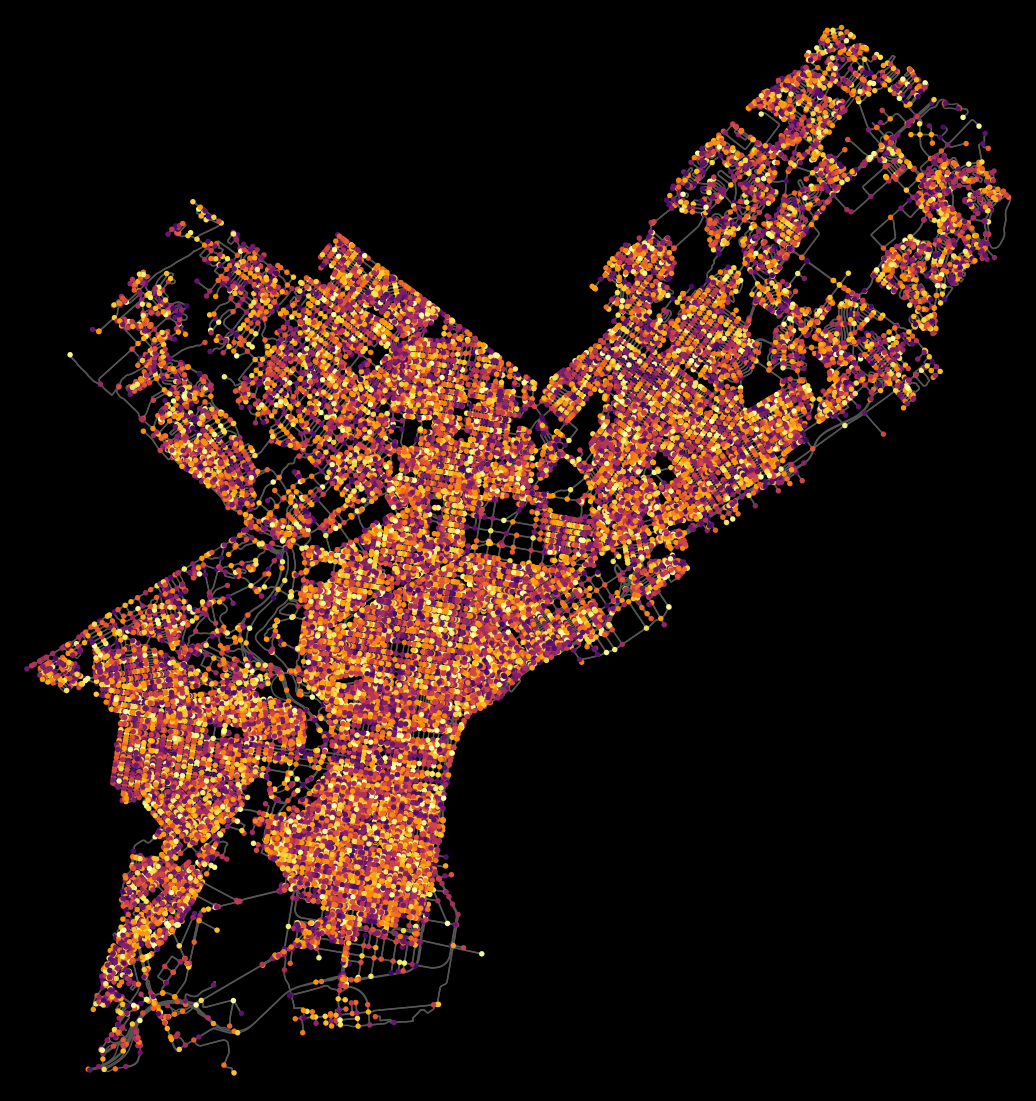

In [263]:
# plot it
df_p = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df_p['colors'] = ox.get_colors(n=len(df_p), cmap='inferno', start=0.2)
df_p = df_p.reindex(full_merged_nx.nodes())
nc = df_p['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, fig_height=20,fig_width=20)

In [264]:
edge_centrality = nx.closeness_centrality(nx.line_graph(G),distance='crime_count')

NetworkXNotImplemented: not implemented for multigraph type

In [ ]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in full_merged_nx.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(full_merged_nx, bgcolor='k', axis_off=True, node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)